![image.png](heart.png)

## **Heart Failure Prediction**
The task of this project is to analyze dataset containing different characteristics of 918 patients to predict heart failures using Python, Machine Learning and data visualization tools. Utilize the pandas data visualization tools to show the correlation between the variables and find out the factors that are most significant factors in heart failure. Utilize machine learning model to create a model to assess the likelihood of a possible heart disease event.
**Understanding the terms/characteristics in the dataset**
**ChestPainType** - TA: Typical Angina - substernal chest pain precipitated by physical exertion or emotional stress and relieved with rest or nitroglycerin; ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
**RestingBP** - resting blood pressure in mm Hg/ millimeters of mercury. A normal reading would be any blood pressure below 120/80 mm Hg and above 90/60 mm Hg in an adult.
**Cholesterol** - Total or serum cholesterol measured in [mm/dl]. Below 200 mg/dL -  is desirable/normal; 200-239 mg/dL - borderline high; 240 mg/dL and above - high.
RestingECG
MaxHR
Oldpeak

## Predictions: 
This analysis is trying to find the best model that can detect if a patient will get a heart disease or not. To come up with a solutiom, I will be using the following models: 
- a LogisticRegression and 
- RandomForestClassifier. 

The logistic regression will be a better suited model for this dataset, because I am trying to predict whether the heart failure is going to happen or not. In addition, the features/variables in the dataset potentially highly correlated. The Logistic regression performs well on such data. 

The random forest fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. But in this case, I predict, using the random forest will be overfitting and logistic regression will be more fitted since the heart data that I was provided with is strongly linked together and highly correlated.

## Step I: Data Preprocessing

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns
# import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
#  Import and read the heart.csv.
heart = pd.read_csv("data.csv")
heart
#Replacing strings with numbers:  creating a dict file 
# gender = {'M': 1,'F': 0}
# heart.Sex = [gender[item] for item in heart.Sex]
ex_angina={'N': 0,'Y': 1}
heart.ExerciseAngina = [ex_angina[item] for item in heart.ExerciseAngina]
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [4]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
heart.shape

(918, 12)

In [6]:
# Check the total missing values in each column. A field with a NULL value is the one that has been left blank during the record creation.
print("Total NULL Values in each columns")
print("*********************************")
print(heart.isnull().sum())

Total NULL Values in each columns
*********************************
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [7]:
#Display statistical description of the features
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [8]:
#styled describe
heart.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
ExerciseAngina,918.000000,0.404139,0.490992,0.000000,0.000000,0.000000,1.000000,1.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


In [8]:
# heart['FastingBS'] = heart['FastingBS'].astype(str)
# heart['HeartDisease'] = heart['HeartDisease'].astype(str)

In [9]:
# corr[abs(corr['HeartDisease']) > 0.1]['HeartDisease']

In [10]:
#cleaning the dataset by removing all zeroes in the column "cholesterol" as there is no 0 cholesterole.
clean_df=heart[heart['Cholesterol'] !=0]
clean_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [11]:
# There were 390 patients with < 50% diameter narrowing of arteries, and 356 patients with  > 50% diameter narrowing of arteries [ 1 = heart disease, 0 - no heart disease]
clean_df['HeartDisease'].value_counts()

0    390
1    356
Name: HeartDisease, dtype: int64

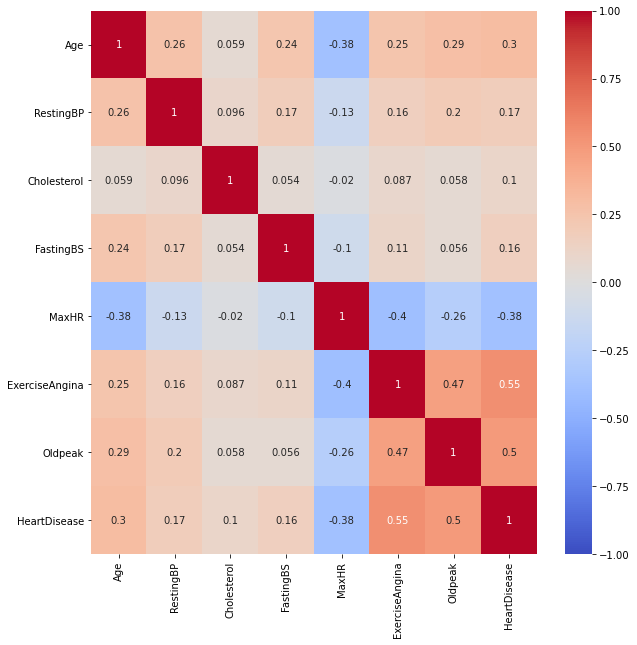

In [12]:
#Correlation Heatmap between the variables
corr = clean_df.corr()
ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [15]:
# Project only necessary columns and separate target feature for training data
projected_df = clean_df[['Age', 'Cholesterol', 'Oldpeak', 'MaxHR', 'ExerciseAngina', 'HeartDisease']]
# cholesterol_df = clean_df[['Cholesterol', 'HeartDisease']]
# cholesterol_df.head()
projected_df

,Age,Cholesterol,Oldpeak,MaxHR,ExerciseAngina,HeartDisease
0,40,289,0.0,172,0,0
1,49,180,1.0,156,0,1
2,37,283,0.0,98,0,0
3,48,214,1.5,108,1,1
4,54,195,0.0,122,0,0
...,...,...,...,...,...,...
913,45,264,1.2,132,0,1
914,68,193,3.4,141,0,1
915,57,131,1.2,115,1,1
916,57,236,0.0,174,0,1


[0.17400924 0.1884407  0.17425752 0.2007271  0.26256544]


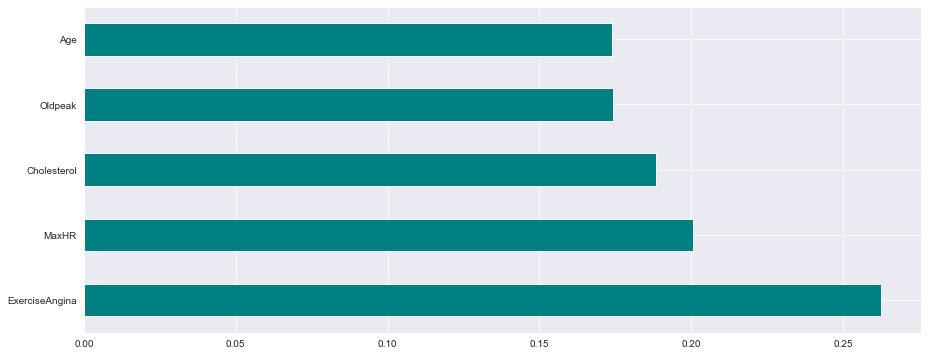

In [16]:
# Feature Selection
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
x = projected_df.iloc[:, :-1]
y = projected_df.iloc[:,-1]

#research it

from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(7).plot(kind='barh', color='teal')
plt.show()

## Machine learning -- Logistic Regression

In [17]:
# Project only Cholesterol column and separate target feature for training data
exercise_df = clean_df[['ExerciseAngina', 'HeartDisease']]
exercise_df 

,ExerciseAngina,HeartDisease
0,0,0
1,0,1
2,0,0
3,1,1
4,0,0
...,...,...
913,0,1
914,0,1
915,1,1
916,0,1


In [18]:
#Load dataset
# Split the dataframe into data and target["HeartDisease"]
y = exercise_df['HeartDisease'].values
X = exercise_df.drop('HeartDisease', axis=1)

In [19]:
# split our data into training and data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
# Encode the target column with 1s and 0s (both train and test)
X_test = X_test[X_train.columns]
target_encoder = LabelEncoder().fit(y_train)
y_train = target_encoder.transform(y_train)
y_test=target_encoder.transform(y_test)
y_test

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [21]:
# Check the shapes to make sure X_train and X_test have the same number of columns (same with y_train/y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(559, 1)
(187, 1)
(559,)
(187,)


In [28]:
#this is for 1 column, exercise angina 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', random_state=3)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

0.7647058823529411
0.776386404293381


In [34]:
le = LabelEncoder()
clean_df["Gender"] = le.fit_transform(clean_df["Sex"])
clean_df

<ipython-input-34-00da44b73977>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["Gender"] = le.fit_transform(clean_df["Sex"])


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Gender
0,40,M,ATA,140,289,0,Normal,172,0,0.0,Up,0,1
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1,0
2,37,M,ATA,130,283,0,ST,98,0,0.0,Up,0,1
3,48,F,ASY,138,214,0,Normal,108,1,1.5,Flat,1,0
4,54,M,NAP,150,195,0,Normal,122,0,0.0,Up,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,0,1.2,Flat,1,1
914,68,M,ASY,144,193,1,Normal,141,0,3.4,Flat,1,1
915,57,M,ASY,130,131,0,Normal,115,1,1.2,Flat,1,1
916,57,F,ATA,130,236,0,LVH,174,0,0.0,Flat,1,0


In [37]:
gender_df = clean_df.drop("Sex", axis=1)
gender_df.copy()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Gender
0,40,ATA,140,289,0,Normal,172,0,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,0,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,0,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,1,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,0,0.0,Up,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,0,1.2,Flat,1,1
914,68,ASY,144,193,1,Normal,141,0,3.4,Flat,1,1
915,57,ASY,130,131,0,Normal,115,1,1.2,Flat,1,1
916,57,ATA,130,236,0,LVH,174,0,0.0,Flat,1,0


In [55]:
projected2_df = gender_df[['Age', 'Cholesterol', 'Oldpeak', 'MaxHR', 'ExerciseAngina', 'HeartDisease']]
projected2_df

,Age,Cholesterol,Oldpeak,MaxHR,ExerciseAngina,HeartDisease
0,40,289,0.0,172,0,0
1,49,180,1.0,156,0,1
2,37,283,0.0,98,0,0
3,48,214,1.5,108,1,1
4,54,195,0.0,122,0,0
...,...,...,...,...,...,...
913,45,264,1.2,132,0,1
914,68,193,3.4,141,0,1
915,57,131,1.2,115,1,1
916,57,236,0.0,174,0,1


In [90]:
gender2_df = gender_df[['Gender', 'HeartDisease']]
gender2_df.copy()

,Gender,HeartDisease
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
913,1,1
914,1,1
915,1,1
916,0,1


In [41]:
#Load dataset
# Split the dataframe into data and target["HeartDisease"]
y = exercise_df['HeartDisease'].values
X = exercise_df.drop('HeartDisease', axis=1)

In [42]:
# split our data into training and data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
# Check the shapes to make sure X_train and X_test have the same number of columns (same with y_train/y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(559, 1)
(187, 1)
(559,)
(187,)


In [44]:
#this is for 1 column, exercise angina 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', random_state=20)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

0.7540106951871658
0.7799642218246869


## Running LR on 5 columns

In [80]:
#Load dataset
# Split the dataframe into data and target["HeartDisease"]
y = projected2_df['HeartDisease'].values
X = projected2_df.drop('HeartDisease', axis=1)

In [81]:
# split our data into training and data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 15)

In [82]:
# Check the shapes to make sure X_train and X_test have the same number of columns (same with y_train/y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(559, 5)
(187, 5)
(559,)
(187,)


In [84]:
#this is fot the projected 6 columns
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', random_state=15)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.813953488372093
0.7807486631016043


In [85]:
# Scale the data
scaler = StandardScaler().fit(X_train)

# Use the scaler on X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
lr = LogisticRegression(solver='lbfgs', random_state=13)
lr.fit(X_train_scaled, y_train)
print(lr.score(X_train_scaled, y_train))
print(lr.score(X_test_scaled, y_test))

0.815742397137746
0.7754010695187166


## Random Forest on All 5 columns

In [61]:
# #Load dataset
# # Split the dataframe into data and target["HeartDisease"]
# y = projected2_df['HeartDisease'].values
# X = projected2_df.drop('HeartDisease', axis=1)

In [62]:
# # split our data into training and data
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20)

In [87]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=35, max_depth=3)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.8264758497316637
0.7967914438502673


In [88]:
# Scale the data
scaler = StandardScaler().fit(X_train)

# Use the scaler on X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
# Train a Random Forest Classifier model on the scaled data and print the model score
rf.fit(X_train_scaled, y_train)
print(rf.score(X_train_scaled, y_train))
print(rf.score(X_test_scaled, y_test))

rf.feature_importances_

0.8318425760286225
0.7914438502673797


array([0.1133865 , 0.0358672 , 0.37753717, 0.20537491, 0.26783422])

## Step II: Machine Learning model


In [ ]:
# Dimensionality Reduction

In [64]:
# #
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [65]:
# # Train the scaler with the X_train data.
# scaler.fit(X_train)

StandardScaler()

In [66]:
# # Split the dataframe into data and target["HeartDisease"]
# y = projected_df['HeartDisease'].values
# X = projected_df.drop('HeartDisease', axis=1)

In [68]:
# # Transform X_train and X_test.
# # Note that the scaler used to transform X_train and X_test was trained on X_train.
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [72]:
# # Scale the data
# scaler = StandardScaler()
# scaled_heart= scaler.fit_transform(projected_df)
# print(scaled_heart[0:6])

[[-1.35607325  0.56806253  0.7504942  -0.84094155  1.29647027 -0.79074163
  -0.95541641]
 [-0.40865641 -1.76036959 -1.09340492  0.0917709   0.64361328 -0.79074163
   1.04666404]
 [-1.67187886  0.56806253  0.64899516 -0.84094155 -1.72299329 -0.79074163
  -0.95541641]
 [-0.51392495 -1.76036959 -0.51824373  0.55812713 -1.31495767  1.26463557
   1.04666404]
 [ 0.11768627  0.56806253 -0.83965733 -0.84094155 -0.74370781 -0.79074163
  -0.95541641]
 [-1.46134178  0.56806253  1.59631948 -0.84094155  1.21486314 -0.79074163
  -0.95541641]]


In [76]:
# # Applying PCA to reduce dimensions from 4 to 2
# from sklearn.decomposition import PCA
# # Initialize PCA model
# pca = PCA(n_components=0.9)

# # Get two principal components for the iris data.
# heart_pca = pca.fit_transform(scaled_heart)
# heart_pca

array([[-2.02481312, -0.14978135,  1.43609162, -0.58226376, -0.19086404,
         0.08852933],
       [-0.69218438,  0.18716192, -0.51871715,  1.69839987,  0.06256274,
        -0.28009037],
       [-0.91808805, -0.26974392,  0.33970783, -1.5143922 ,  1.75081641,
         1.53607399],
       ...,
       [ 1.790131  , -1.68071335, -0.93133792,  0.59605236,  0.66960164,
        -0.56283461],
       [-1.03311197,  0.99898979, -0.38900883,  0.83875918, -0.58642889,
        -1.30972259],
       [-2.25976927, -1.59982786,  0.62723197,  0.34364967,  0.01423375,
        -0.07340923]])

In [78]:
# # Assess the accuracy score
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [77]:
# Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA
# model, it is possible to state the desired explained variance.
# pca = PCA(n_components=0.90)
# get principal components for the data
# pca_crypto_data = pca.fit_transform(scaled_crypto)

## Data Visualization

In [56]:
# #  Group by gender and get the number to plot
# distr_gender = clean_df.groupby(["Sex"])
# gender_df= pd.DataFrame(distr_gender.size())
# gender_df

# # Create the dataframe with total count of Female and Male
# gender_df.columns = ["Total Count"]
# gender_df

,Total Count
Sex,
0,182
1,564


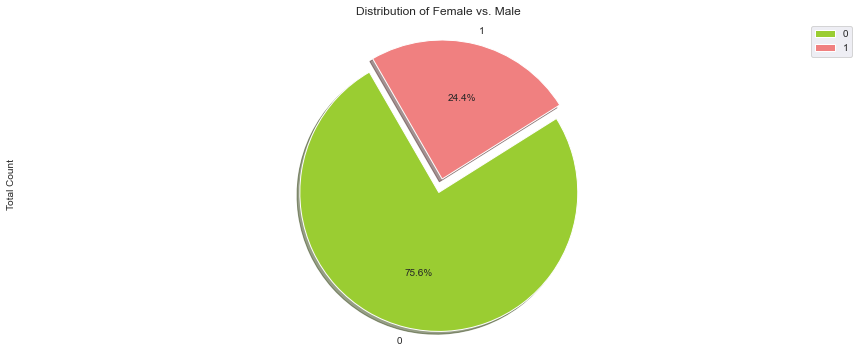

In [55]:
# # # Gender Breakdown
# colors = ["yellowgreen", "lightcoral"]
# #define how the pie will devide/explode
# explode = (0.1, 0)
# gender_df.plot.pie(y='Total Count', colors = colors, startangle=120, explode = explode, shadow = True, autopct="%1.1f%%")
# plt.title("Distribution of Female vs. Male")
# plt.axis("equal")
# plt.show()